In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [17]:
def price(x, k, b):
    return k * x + b

def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(y)

def partial_k(x):
    return sum(abs(-1 / len(x) * x))

def partial_b(x):
    return 1 / len(x)
    

In [19]:
yy= 11*x -49
loss(yy,y_hat)

83.24680798848853

In [23]:
partial_k(x)
partial_b(x)

0.001976284584980237

When time is : 0, get best_k: 105.5908327421777 best_b: 200, and the loss is: 837.8286106429897
When time is : 0, get best_k: 16.905138456463842 best_b: -89.79591836734677, and the loss is: 7.802516489562599


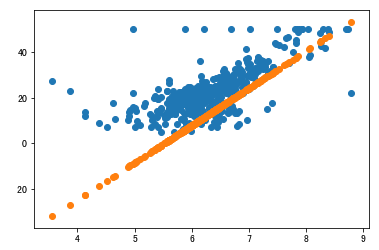

In [136]:
data = load_boston()
x, y =data['data'][:, 5], data['target']
min_loss = float('inf')
current_k = random.random() * 200 - 10
current_b = 200
learning_rate = 1e-01
update_time = 0
trying_times = 20000


min_loss = float('inf')
for i in range(trying_times):
    y_hat = [price(feature , current_k, current_b) for feature in x_copy]
    current_loss = loss(y_copy, y_hat)
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 200 == 0 :
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    else:break
    k_gradient = partial_k(x_copy)
    b_gradient = partial_b(x_copy)
    if current_k > 0 :
        current_k = current_k + (-1 * k_gradient) * learning_rate
    else:
        current_k = current_k + (1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * 1000   
    
min_loss = float('inf')
for i in range(trying_times):
    y_hat = [price(feature , current_k, current_b) for feature in x_copy]
    current_loss = loss(y_copy, y_hat)
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 1 == 0 :
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    else: break
    k_gradient = partial_k(x_copy)
    b_gradient = partial_b(x_copy)
    if current_k > 0 :
        current_k = current_k + (-1 * k_gradient) * learning_rate
    else:
        current_k = current_k + (1 * k_gradient) * learning_rate
#     current_b = current_b + (-1 * b_gradient) * learning_rate


plt.scatter(x, y)
plt.scatter(x_copy, y_hat)

In [83]:
import numpy as np
import pandas as pd

def drop_noisy(df):
    df_copy = df.copy()
    df_describe = df_copy.describe()
    for column in df.columns:
        mean = df_describe.loc['mean',column]
        std = df_describe.loc['std',column]
        minvalue = mean - 1*std
        maxvalue = mean + 1*std
        df_copy = df_copy[df_copy[column] >= minvalue]
        df_copy = df_copy[df_copy[column] <= maxvalue]
    return df_copy


9.188011545278203 22.532806324110677 -5 50


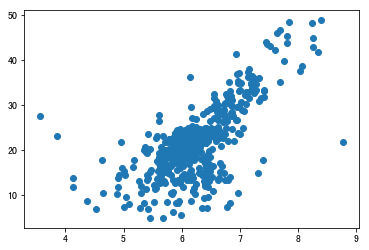

In [88]:
y_copy = y.copy()
std = np.std(y_copy)
mean = np.mean(y_copy)
minvalue = int(mean - 3*std)
maxvalue = int(mean + 3*std)
print(std,mean,minvalue,maxvalue)
y_copy = y_copy[y<maxvalue]
x_copy = x.copy()
x_copy = x_copy[y<maxvalue]
plt.scatter(x_copy, y_copy)